Name - Amitesh Kumar</br>
Roll No - 1901023<br/>
Email - amitesh.kumar@iiitg.ac.in

1. Implement the linear regression using the Gradient Descent
Algorithm (batch mode) using the given data splittings:
Dataset: Boston house pricing dataset.

In [ ]:
from sklearn import datasets
boston = datasets.load_boston(return_X_y=False)

In [ ]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
print(boston['data'].shape)

(506, 13)


In [ ]:
from sklearn.model_selection import train_test_split
import random
# train(30%), validation (10%), and test(60%)
X_train, X_test, y_train, y_test = train_test_split(boston['data'],boston['target'] , test_size=0.7, random_state=random.randint(30,100))
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.14, random_state=random.randint(30,100))
print("Size of the train dataset:",X_train.shape)
print("Size of the test dataset:",X_test.shape)
print("Size of the validation dataset:",X_validation.shape)

Size of the train dataset: (151, 13)
Size of the test dataset: (305, 13)
Size of the validation dataset: (50, 13)


In [ ]:
import numpy as np
import random
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10):
    # Here we have to do H(Xi) = w0 + w1Xi
    # ep mens the error value
    # epoch menas the interations
    converged = False
    iter = 0
    m = x.shape[0] # Number of samples/patterns (m=31)
    # Initial Weights
    weight = np.ones(x.shape[1]+1)
    random.seed(10)
    for i in range(0,x.shape[1]+1):
      weight[i] = random.uniform(-0.3, 0.3)
    #weight_0 = random.uniform(-0.3, 0.3) # Weights
    #weight_1 = random.uniform(-0.3, 0.3) # Weights
    total_error = 0
    temp_in = 0
    for i in range(0,m): # vary the row
      for j in range(0,x.shape[1]):
        temp_in = temp_in + weight[j+1]*x[i][j]
      total_error = total_error + (weight[0] + temp_in - y[i])**2 # total error
    print("Intial Error",total_error)
    # Iterate Loop
    sum = np.ones(x.shape[1]+1)
    while not converged:
        error = 0
        # Update the weight
        temp_in = 0
        temp_out = 0
        for i in range(0,m): # fix the row
          for j in range(0,x.shape[1]): # fix the column
            temp_in = temp_in + weight[j+1]*x[i][j] #hypothesis calculation
          temp_out = temp_out + (weight[0] + temp_in - y[j])*1
        sum[0] = temp_out

        for k in range(1,x.shape[1]):
          temp_in = 0 
          temp_out = 0
          for i in range(0,m): # vary the row
            for j in range(0,x.shape[1]):
              temp_in = temp_in + weight[j+1]*x[i][j]
            temp_out = temp_out + (weight[1] + temp_in - y[j])*x[i][k]
          sum[k+1] = temp_out
        # weight updatation
        for j in range(0,x.shape[1]):
          weight[j] = weight[j] - (alpha/m) * sum[j]
        # Calculate the Mean Squared Error
        for i in range(0,m): # vary the row
          for j in range(0,x.shape[1]):
            temp_in = temp_in + weight[j+1]*x[i][j]
          error = error + (weight[0] + temp_in - y[i])**2 # total error
        print(error)
        if abs(total_error-error) <= ep:
            print(total_error)
            print(error)
            print('Converged, iterations: ', iter, '!!!')
            converged = True
        total_error = error  # update error 
        iter += 1  # update iter
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True
    return weight,error

In [ ]:
alpha = [ 0.1, 0.001, 0.0001, 0.5, 1.0]
mse = np.ones(5)
weight = np.ones(14)
for i in range(5):
  weight,mse[i] = gradient_descent(alpha[i], X_train, y_train, ep=0, max_iter=1000)

Intial Error 857794668.9298929
4.4502627804184193e+21
2.2048209505702523e+34
1.092306383865997e+47
5.411474354478143e+59
2.6809377955781222e+72
1.3281828560845672e+85
6.580047109286052e+97
3.259868907513367e+110
1.614995321108791e+123
8.000965563958331e+135
3.9638164345700107e+148
1.9637430759287153e+161
9.728722134117465e+173
4.819776859969573e+186
2.3878006442832255e+199
1.1829576518767254e+212
5.860576382220428e+224
2.9034306914833694e+237
1.4384096768744287e+250
7.126129804286574e+262
3.530407699834631e+275
1.7490249082404247e+288
8.664971271699611e+300
inf
inf
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
nan
nan
nan
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: ignored

In [ ]:
weight,mse = gradient_descent(0.1, X_train, y_train, ep=0.5, max_iter=10)
# validation mse
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error

Intial Error 878923581.0088302
663493372623.4982
663493372623.4982
Converged, iterations:  1 !!!


In [ ]:
print(error)

260335832936.87228


In [ ]:
weight,mse = gradient_descent(0.01, X_train, y_train, ep=0.6, max_iter=20)
# validation mse
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print(error)

Intial Error 878923581.0088302
343812550.5995353
343812550.5995353
Converged, iterations:  1 !!!
2216168350.5295186


In [ ]:
weight,mse = gradient_descent(0.02, X_train, y_train, ep=0.7, max_iter=30)
# validation mse
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print(error)

Intial Error 878923581.0088302
10015947820.52335
10015947820.52335
Converged, iterations:  1 !!!
9700386319.888268


In [ ]:
weight,mse = gradient_descent(0.03, X_train, y_train, ep=0.8, max_iter=40)
# validation mse
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print(error)

Intial Error 878923581.0088302
35690870386.10229
35690870386.10229
Converged, iterations:  1 !!!
22483540479.86128


In [ ]:
weight,mse = gradient_descent(0.001, X_train, y_train, ep=0.9, max_iter=50)
# validation mse
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print(error)

Intial Error 878923581.0088302
5321273945.453223
5321273945.453223
Converged, iterations:  1 !!!
10962621.081855852


In [ ]:
Train MSE, Test MSE, Validation MSE considering the best
set of hyperparameters
III. Graph plotting for Train MSE vs. Epochs considering the
best set of hyperparameters

In [ ]:
659316193277.154
702428642.4330704
27186543086.0606
116406280648.20908
202483337.3731066

In [ ]:
# best hyper
weight,mse = gradient_descent(0.001, X_train, y_train, ep=0.9, max_iter=50)
print("train mse",mse)
# validation mse
temp_in = 0
error=0
for i in range(0,X_validation.shape[0]): # vary the row
  for j in range(0,X_validation.shape[1]):
    temp_in = temp_in + weight[j+1]*X_validation[i][j]
  error = error + (weight[0] + temp_in - y_validation[i])**2 # total error
print("validation mse",error)
temp_in = 0
error=0
for i in range(0,X_test.shape[0]): # vary the row
  for j in range(0,X_test.shape[1]):
    temp_in = temp_in + weight[j+1]*X_test[i][j]
  error = error + (weight[0] + temp_in - y_test[i])**2 # total error
print("test mse",error)

Intial Error 878923581.0088302
5321273945.453223
5321273945.453223
Converged, iterations:  1 !!!
train mse 5321273945.453223
validation mse 10962621.081855852
test mse 6606215603.940079


In [ ]:
itr = [10,20,30,40,50,60]
ny_mse = np.ones(6)
for i in range(0,6):
  weight,mse = gradient_descent(0.3, X_train, y_train, ep=0.1, max_iter = itr[i])
  ny_mse[i] = mse

Intial Error 878923581.0088302
6777967377414.37
6777967377414.37
Converged, iterations:  1 !!!
Intial Error 878923581.0088302
6777967377414.37
6777967377414.37
Converged, iterations:  1 !!!
Intial Error 878923581.0088302
6777967377414.37
6777967377414.37
Converged, iterations:  1 !!!
Intial Error 878923581.0088302
6777967377414.37
6777967377414.37
Converged, iterations:  1 !!!
Intial Error 878923581.0088302
6777967377414.37
6777967377414.37
Converged, iterations:  1 !!!
Intial Error 878923581.0088302
6777967377414.37
6777967377414.37
Converged, iterations:  1 !!!


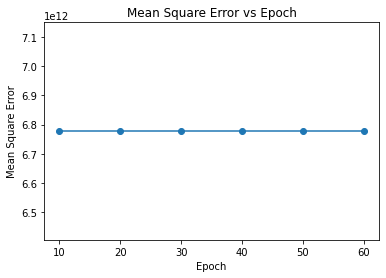

In [ ]:
import matplotlib.pyplot as plt
plt.title("Mean Square Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Mean Square Error")
plt.plot(itr, ny_mse,'-o')
plt.show()

In [ ]:
Learning rate : 0.01, rho : 0.6, epoch : 20

Learning rate : 0.1 , rho : 0.5, epoch : 10<br/>
ii) Learning rate : 0.01, rho : 0.6, epoch : 20<br/>
iii) Learning rate : 0.02, rho : 0.7, epoch : 30<br/>
iv) Learning rate : 0.03, rho : 0.8, epoch : 40<br/>
v) Learning rate : 0.001, rho : 0.9, epoch: 50<br/>
Note: Same weights should be initialized every time; 4 marks for
only correct coding without results